# Communities and Crime Data Set

Context
Introduction: The dataset used for this experiment is real and authentic. The dataset is acquired from UCI machine learning repository website [13]. The title of the dataset is ‘Crime and Communities’. It is prepared using real data from socio-economic data from 1990 US Census, law enforcement data from the 1990 US LEMAS survey, and crimedata from the 1995 FBI UCR [13]. This dataset contains a total number of 147 attributes and 2216 instances.

The per capita crimes variables were calculated using population values included in the 1995 FBI data (which differ from the 1990 Census values).

Content
The variables included in the dataset involve the community, such as the percent of the population considered urban, and the median family income, and involving law enforcement, such as per capita number of police officers, and percent of officers assigned to drug units. The crime attributes (N=18) that could be predicted are the 8 crimes considered 'Index Crimes' by the FBI)(Murders, Rape, Robbery, …. ), per capita (actually per 100,000 population) versions of each, and Per Capita Violent Crimes and Per Capita Nonviolent Crimes)

Total variables : 128
Observations : 1994




In [69]:
import numpy as np
from pandas import read_csv
import matplotlib.pyplot as plt
#%matplotlib inline

In [70]:
attrib = pread_csv('name of the column.csv', delim_whitespace = True)

In [71]:
data = read_csv('communities_crime.csv', names = attrib['attributes'])

In [72]:
print(data.shape)

(1994, 128)


In [21]:
data.head()

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03


In [73]:
data = data.drop(columns=['state','county',
                          'community','communityname',
                          'fold'], axis=1)
data.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03


In [76]:
from pandas import DataFrame

data = data.replace('?', np.nan)
feat_miss = data.columns[data.isnull().any()]

In [77]:
print(feat_miss)
feat_miss.shape

Index(['OtherPerCap', 'LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps',
       'LemasSwFTFieldPerPop', 'LemasTotalReq', 'LemasTotReqPerPop',
       'PolicReqPerOffic', 'PolicPerPop', 'RacialMatchCommPol',
       'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp', 'PctPolicAsian',
       'PctPolicMinor', 'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz',
       'PolicAveOTWorked', 'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr',
       'LemasGangUnitDeploy', 'PolicBudgPerPop'],
      dtype='object')


(23,)

In [78]:
# Impute mean values for samples with missing values
from sklearn.impute import SimpleImputer

In [79]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')

imputer = imputer.fit(data[['OtherPerCap']])
data[['OtherPerCap']] = imputer.transform(data[['OtherPerCap']])


In [80]:
data = data.dropna(axis=1)
print(data.shape)
data.head()

(1994, 101)


,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.32,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.00,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.00,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.00,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.00,0.03


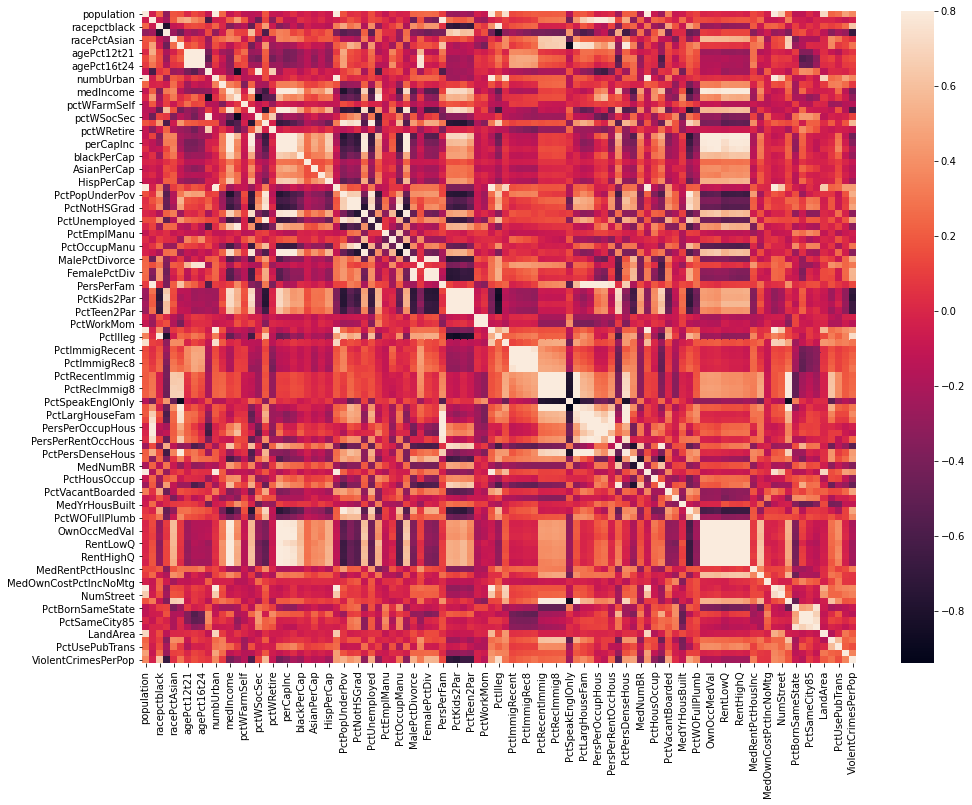

In [60]:
import seaborn as sns

corrmat = data.corr()
fig = plt.figure(figsize = (16, 12))

sns.heatmap(corrmat, vmax = 0.8)
plt.show()

In [81]:
corrT = data.corr(method = 'pearson').round(4)
corrT = corrT.sort_values(by=['ViolentCrimesPerPop'])
corrT['ViolentCrimesPerPop']

PctKids2Par           -0.7384
PctFam2Par            -0.7067
racePctWhite          -0.6848
PctYoungKids2Par      -0.6661
PctTeen2Par           -0.6616
                        ...  
FemalePctDiv           0.5560
pctWPubAsst            0.5747
racepctblack           0.6313
PctIlleg               0.7380
ViolentCrimesPerPop    1.0000
Name: ViolentCrimesPerPop, Length: 101, dtype: float64

## Dimensionality Reduction - Principal Component Analysis (PCA)

The dataset contain many variables highly correlated. Multicolinearity will increase the model variance. Dimensionality reduction utilizing PCA can provide an optimal set of orthogonal features. Let's adopt the criterion in which we select those principal components responsible to explain more than a unit variance.

In [61]:
#Shuffle the rows of the dataframe
data = data.sample(frac = 1, random_state=0)

In [82]:
X = data.iloc[:, 0:30]
y = data.iloc[:, 99]

#split to train and test for cross-validation
from sklearn.model_selection import train_test_split
seed = 0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = seed)


print(X.shape)
print(y.shape)

(1994, 30)
(1994,)


In [83]:
from sklearn.preprocessing import StandardScaler

# Standardize features by removing the mean and scaling to unit variance

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [65]:
from sklearn.decomposition import PCA

import pandas as pd
pca = PCA()
df_pca = pca.fit_transform(X=X)

# Store as dataframe and print
df_pca = pd.DataFrame(df_pca)
print(df_pca.shape) 
df_pca.round(2).head()


(1994, 30)


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-0.44,-0.75,0.07,-0.12,-0.01,0.11,0.15,-0.05,0.06,-0.20,...,0.01,-0.05,-0.03,-0.01,-0.03,0.05,0.01,-0.01,-0.00,0.01
1,-0.69,-0.41,-0.73,-0.33,-0.45,0.25,-0.38,-0.22,-0.03,0.17,...,-0.01,-0.01,0.00,-0.04,0.02,-0.01,-0.03,0.03,-0.02,0.01
2,-0.14,0.08,0.73,-0.19,0.03,-0.11,-0.04,0.05,-0.15,-0.17,...,0.01,-0.02,-0.02,0.03,0.00,-0.00,0.01,-0.00,-0.01,0.01
3,0.81,0.02,-0.09,-0.02,-0.07,-0.18,0.09,-0.01,-0.11,0.08,...,-0.03,0.00,-0.04,-0.02,0.03,-0.03,-0.00,-0.01,0.01,-0.00
4,0.63,0.33,-0.16,0.24,0.19,0.14,-0.03,-0.43,-0.25,-0.34,...,0.00,-0.07,-0.00,-0.00,0.01,0.06,-0.01,-0.02,0.01,-0.00


Amount of variance: [9.29172845e+00 5.03685976e+00 3.38889824e+00 2.00222115e+00
 1.45829423e+00 1.21985960e+00 1.20493925e+00 8.93888441e-01
 8.73780013e-01 7.58316196e-01 6.47194200e-01 5.99685241e-01
 5.62787046e-01 4.35655226e-01 4.05610127e-01 3.13454593e-01
 2.59597036e-01 1.74688360e-01 1.25980219e-01 9.74589752e-02
 7.46963411e-02 4.78312162e-02 4.24164989e-02 3.36169264e-02
 2.60317433e-02 2.05864898e-02 1.03274039e-02 7.88258237e-03
 5.30970190e-03 1.92555063e-03]
Sum of the variance: 30.02
Percentage of variance: [3.09502257e-01 1.67774970e-01 1.12882298e-01 6.66928623e-02
 4.85749618e-02 4.06328382e-02 4.01358498e-02 2.97749220e-02
 2.91051216e-02 2.52590867e-02 2.15576754e-02 1.99751786e-02
 1.87461205e-02 1.45114309e-02 1.35106456e-02 1.04409965e-02
 8.64703149e-03 5.81877119e-03 4.19633034e-03 3.24630374e-03
 2.48809318e-03 1.59323095e-03 1.41286976e-03 1.11976094e-03
 8.67102752e-04 6.85724415e-04 3.44000025e-04 2.62564393e-04
 1.76863189e-04 6.41390103e-05]
Sum of the 

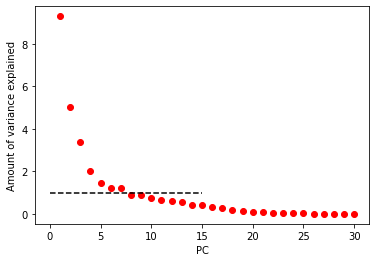

(1395, 30)


In [84]:
from sklearn.decomposition import PCA

c = 30
pca = PCA(n_components = c)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

print("Amount of variance: %s" % pca.explained_variance_)
print("Sum of the variance: %s" % sum(pca.explained_variance_).round(2))

print("Percentage of variance: %s" % pca.explained_variance_ratio_)
print("Sum of the percentage of variance: %s" % sum(pca.explained_variance_ratio_).round(2))


plt.scatter(np.arange(1,(c+1)),pca.explained_variance_, c = 'red')
plt.plot((0,15), (1,1), color = 'black', linestyle = 'dashed')
plt.xlabel('PC')
plt.ylabel('Amount of variance explained')
plt.show()
print(X_train.shape)

In [85]:
#importing OLS statsmodel to check the p-values of the X variable
import statsmodels.api as sm
X2 = sm.add_constant(X) 
ols = sm.OLS(y,X2)
lr = ols.fit()
print(lr.summary())

                             OLS Regression Results                            
Dep. Variable:     LemasPctOfficDrugUn   R-squared:                       0.308
Model:                             OLS   Adj. R-squared:                  0.298
Method:                  Least Squares   F-statistic:                     29.15
Date:                 Thu, 27 May 2021   Prob (F-statistic):          6.05e-134
Time:                         23:35:24   Log-Likelihood:                 381.46
No. Observations:                 1994   AIC:                            -700.9
Df Residuals:                     1963   BIC:                            -527.4
Df Model:                           30                                         
Covariance Type:             nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.1816      

In [86]:
#Backward feature elimination
maxp = lr.pvalues.max()
while(maxp > 0.05):
    X2.drop(lr.pvalues.idxmax(),axis=1,inplace=True) 
    ols = sm.OLS(y,X2)
    lr = ols.fit()
    maxp = lr.pvalues.max()
print(lr.summary())

                             OLS Regression Results                            
Dep. Variable:     LemasPctOfficDrugUn   R-squared:                       0.304
Model:                             OLS   Adj. R-squared:                  0.300
Method:                  Least Squares   F-statistic:                     78.52
Date:                 Thu, 27 May 2021   Prob (F-statistic):          5.85e-147
Time:                         23:35:34   Log-Likelihood:                 374.71
No. Observations:                 1994   AIC:                            -725.4
Df Residuals:                     1982   BIC:                            -658.2
Df Model:                           11                                         
Covariance Type:             nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.2878      0.075 

In [87]:
#For cross-validation using train-test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 random_state=1,test_size=0.2)

In [88]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)


0.38342106006542187

In [90]:
y_pred = model.predict(X_test)
from sklearn.metrics import r2_score,mean_squared_error
import math

print(r2_score(y_test,y_pred)) #r2
print(mean_squared_error(y_test,y_pred)) # mse
print(math.sqrt(mean_squared_error(y_test,y_pred)))#rmse


0.38342106006542187
0.03913443235836777
0.19782424613370264


In [43]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print('R^2: %.4f' % r2_score(y_train,y_pred))
print('MSE: %.4f' % mean_squared_error(y_train,y_pred))
print('MAE: %.4f' % mean_absolute_error(y_train,y_pred))
print('rms: %.4f' % rms)



R^2: 0.3121
MSE: 0.0394
MAE: 0.1166
rms: 0.2007


In [91]:
#dimensions of data
n = len(X_test)
k = len(X_test)
R2 = r2_score(y_test,y_pred)
R2

0.38342106006542187

In [92]:
#Adj R^2 is useful in multiple regression 
#as it accounts for number of variables in the scoring

Adj_R2 = 1 - ((n-1)*(1- R2)/(n-k-1))
print(Adj_R2)

246.3984180939621


### K-Fold Crossvalidation

In [93]:
#k-fold cross validation using linear regression model

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
cross_val_score(LinearRegression(),X,y,cv=5).mean()

0.2773449798675782

In [94]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [95]:
model.intercept_

-0.1815835322120215

In [96]:
model.coef_

array([ 0.70408258, -0.15729183,  0.32523483,  0.28871703,  0.04957563,
        0.20773616, -0.02041625,  0.07691406,  0.1052371 , -0.03718558,
        0.35674625,  0.09359952,  0.07095936, -0.16495555, -0.04012709,
        0.07843237, -0.09435942,  0.08032888, -0.05510813, -0.15054405,
       -0.26731847,  0.3652249 , -0.06962577,  0.005213  ,  0.00800482,
        0.0216058 , -0.02800715, -0.46797775, -0.02271358,  0.03775285])

Inferences:

SoundPressure = -0.1815 + 0.70408258 *Population etc, -0.15729183 * aRaceblk  0.32523483 * Racewhite +  0.32523483 * Race Asian 0.04957563 * agepct12-21

The model is weak because the k-fold R^2 value is very low. May be a different model (non-linear) will be better to predict the output variable as the correlation study suggests.

In [97]:
#import the knn model
from sklearn.neighbors import KNeighborsRegressor


In [98]:
model = KNeighborsRegressor(n_neighbors=8)
print(model)
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=8, p=2,
          weights='uniform') 

KNeighborsRegressor(n_neighbors=8)


KNeighborsRegressor(n_jobs=1, n_neighbors=8)

In [99]:
model.fit(X,y)

KNeighborsRegressor(n_neighbors=8)

In [100]:
#for no.of neighbors from 1 - 10, graph the k-fold scores
scores = []
for i in range(1,11,1):
    knn = KNeighborsRegressor(n_neighbors=i, weights='uniform')
    scores.append(cross_val_score(knn,X,y,cv=5).mean())

In [101]:
#see the cross_validated score for cv=5
from sklearn.model_selection import cross_val_score
cross_val_score(knn,X_train,y_train,cv=5).mean()

0.24235290819638128

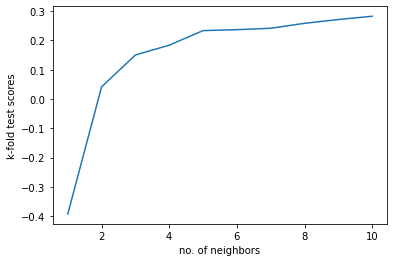

In [102]:
import matplotlib.pyplot as plt
plt.plot(range(1,11,1),scores)
plt.xlabel('no. of neighbors')
plt.ylabel('k-fold test scores')
plt.show()


###### 5-NN is the best model

In [106]:
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=4)

# Printing all the parameters of KNN
print(RegModel)

# Creating the model on Training Data
KNN=RegModel.fit(X_train,y_train)
prediction=KNN.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, KNN.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
# The variable importance chart is not available for KNN K-Nearest Neighbor(KNN)


KNeighborsRegressor(n_neighbors=4)
R2 Value: 0.5018073740076527


In [107]:
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10,)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),4))



Accuracy values for 10-fold Cross Validation:
 [ 0.29597396  0.21260538  0.216126    0.25444541  0.15174873 -0.04034926
  0.13741676  0.32918038  0.30425797  0.09821684]

Final Average Accuracy of the model: 0.196


In [108]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
seed = 0
models = []
models.append(('LR', LinearRegression()))
models.append(('SVR', SVR()))
models.append(('DTR', DecisionTreeRegressor(random_state=seed)))
models.append(('RFR (100 Trees)', RandomForestRegressor(n_estimators=100, random_state=seed)))

LR: 0.246 (+/- 0.038)
SVR: 0.364 (+/- 0.033)
DTR: -0.060 (+/- 0.126)
RFR (100 Trees): 0.443 (+/- 0.036)


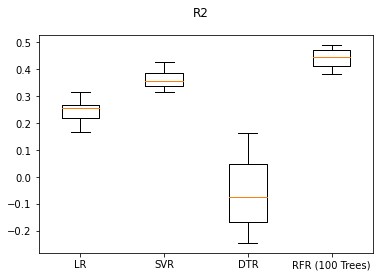

In [109]:
myplot(X_train, y_train)

#SVR MODEL

In [110]:
from sklearn.svm import LinearSVR
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale
from sklearn.svm import LinearSVR, NuSVR, OneClassSVM


linear_svr = LinearSVR(max_iter=1000000)
linear_svr.fit(X_train, y_train)


LinearSVR(max_iter=1000000)

In [111]:
Y_preds = linear_svr.predict(X_test)

print(Y_preds[:20])
print(y_test[:20])

print('Test R^2 Score : %.3f'%linear_svr.score(X_test, y_test)) ## Score method also evaluates accuracy for classification models.
print('Training R^2 Score : %.3f'%linear_svr.score(X_train, y_train))


[-0.00050041  0.00619168  0.04266905 -0.00333081  0.00473912 -0.00652203
  0.01149057 -0.00104027 -0.00011493  0.00386438  0.05272309 -0.00311381
  0.00404615  0.01127851  0.00207213  0.00242074  0.01470936 -0.00078371
  0.00277563 -0.00027415]
1746    0.00
1556    0.00
56      0.57
1740    0.00
913     0.00
1781    0.00
613     0.00
414     0.00
1290    0.00
804     0.00
906     0.77
1179    0.00
321     0.00
120     0.00
1824    0.00
547     0.00
1342    0.00
1676    0.00
1986    0.00
1301    0.00
Name: LemasPctOfficDrugUn, dtype: float64
Test R^2 Score : 0.138
Training R^2 Score : 0.079


In [112]:
print( linear_svr.coef_)


[-2.63259230e-01  1.80284423e-03  1.36305871e-02  1.72744543e-02
  4.61219441e-04  3.62184895e-03  5.02333215e-03  9.49233513e-03
 -1.08874693e-02  9.46583588e-04  3.60578796e-01 -1.08283646e-02
  1.11087188e-03  6.50690840e-04 -2.44249382e-05  2.47086076e-03
  3.10883424e-03 -3.75097455e-03  1.18016992e-03 -4.29543330e-05
 -1.50873695e-02  1.90402432e-02  4.51732050e-05 -5.11044079e-04
 -1.19343330e-03 -6.91141594e-04  9.39797339e-04  5.01116766e-01
 -2.31201403e-02  2.31177151e-03]


In [113]:
print("Model Intercept :", linear_svr.intercept_)


Model Intercept : [-0.02417922]


In [114]:
linear_svr.fit(X_train, y_train)

score = linear_svr.score(X_train, y_train)
print(score)


0.07987100082462228


In [115]:
cv_score = cross_val_score(linear_svr, X, y, cv = 10)
print("CV mean score: ", cv_score.mean())


CV mean score:  0.10370858403142198


In [116]:
score = linear_svr.score(X_train, y_train)
print("R-squared:", score)


R-squared: 0.07987100082462228


###### Random Forest

In [117]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt


In [118]:
#Graph k-fold score vs no. of estimators in Random Forest
scores = []
for i in range(10,101,10):
    scores.append(cross_val_score(RandomForestRegressor(n_estimators=i,random_state=9),
                                  X,y,cv=4).mean())

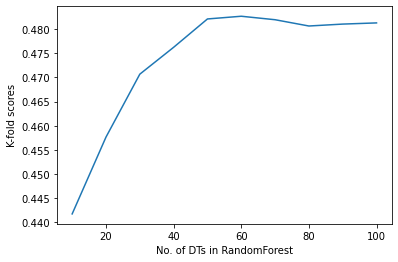

In [119]:
plt.plot(range(10,101,10),scores)
plt.xlabel('No. of DTs in RandomForest')
plt.ylabel('K-fold scores')
plt.show()

In [120]:
params = {
            'n_estimators': [100,110,120,130],
            'max_depth': [13,14,15]
        }
model = GridSearchCV(RandomForestRegressor(), params,cv=4)
model.fit(X,y)

GridSearchCV(cv=4, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [13, 14, 15],
                         'n_estimators': [100, 110, 120, 130]})

In [123]:
model.best_params_

{'max_depth': 13, 'n_estimators': 120}

In [124]:
model.best_score_

0.48181392498320064

In [126]:
best_model = model.best_estimator_

In [127]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=5)

In [128]:
best_model.fit(X_train,y_train)

RandomForestRegressor(max_depth=13, n_estimators=120)

In [129]:
best_model.score(X_test,y_test)

0.4776810608935621

In [130]:
cross_val_score(RandomForestRegressor(n_estimators=120,max_depth=14),X,y,cv=4)

array([0.51857081, 0.48247168, 0.437851  , 0.45715657])

AdABoost 

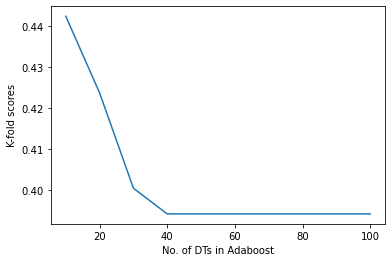

In [131]:
from sklearn.ensemble import AdaBoostRegressor

#Graph k-fold score vs no. of estimators in Adaboost which uses DT as base estimators
scores = []
for i in range(10,101,10):
    scores.append(cross_val_score(AdaBoostRegressor(n_estimators=i,random_state=0),
                                  X,y,cv=4).mean())
plt.plot(range(10,101,10),scores)
plt.xlabel('No. of DTs in Adaboost')
plt.ylabel('K-fold scores')
plt.show()

In [66]:
from sklearn.tree import DecisionTreeRegressor
#including other params like max_depth, we will apply gridsearch to fine the best settings 
params = {
            'n_estimators': [70,80,90,100],
            'base_estimator': [DecisionTreeRegressor(max_depth=9,random_state=0),
                               DecisionTreeRegressor(max_depth=10,random_state=0),
                               DecisionTreeRegressor(max_depth=11,random_state=0)]
        }
model = GridSearchCV(AdaBoostRegressor(random_state=0), params,cv=4)
model.fit(X,y)

GridSearchCV(cv=4, estimator=AdaBoostRegressor(random_state=0),
             param_grid={'base_estimator': [DecisionTreeRegressor(max_depth=9,
                                                                  random_state=0),
                                            DecisionTreeRegressor(max_depth=10,
                                                                  random_state=0),
                                            DecisionTreeRegressor(max_depth=11,
                                                                  random_state=0)],
                         'n_estimators': [70, 80, 90, 100]})

In [132]:
model.best_params_

{'max_depth': 13, 'n_estimators': 120}

In [133]:
model.best_score_

0.48181392498320064

###### PySpark 

In [1]:
#set environment
import os
import sys
 
os.environ["SPARK_HOME"] = "/usr/hdp/current/spark2-client"
os.environ["PYLIB"] = os.environ["SPARK_HOME"] + "/python/lib"
# In below two lines, use /usr/bin/python2.7 if you want to use Python 2
os.environ["PYSPARK_PYTHON"] = "/usr/local/anaconda/bin/python" 
os.environ["PYSPARK_DRIVER_PYTHON"] = "/usr/local/anaconda/bin/python"
sys.path.insert(0, os.environ["PYLIB"] +"/py4j-0.10.4-src.zip")
sys.path.insert(0, os.environ["PYLIB"] +"/pyspark.zip")

In [4]:
#renaming the columns
data = data.toDF('state',"county","community","communityname","fold","population","householdsize","racepctblack","racePctWhite","racePctAsian",
                                       "racePctHisp","agePct12t21","agePct12t29","agePct16t24","agePct65up","numbUrban","pctUrban","medIncome",
                                       "pctWWage","pctWFarmSelf","pctWInvInc","pctWSocSec","pctWPubAsst","pctWRetire","medFamInc",
                                       "perCapInc","whitePerCap","blackPerCap","indianPerCap","AsianPerCap","OtherPerCap","HispPerCap",
                                       "NumUnderPov","PctPopUnderPov","PctLess9thGrade","PctNotHSGrad","PctBSorMore","PctUnemployed",
                                       "PctEmploy","PctEmplManu","PctEmplProfServ","PctOccupManu","PctOccupMgmtProf","MalePctDivorce", 
                                       "MalePctNevMarr","FemalePctDiv","TotalPctDiv","PersPerFam","PctFam2Par","PctKids2Par", 
                                       "PctYoungKids2Par","PctTeen2Par","PctWorkMomYoungKids","PctWorkMom","NumIlleg","PctIlleg", 
                                       "NumImmig","PctImmigRecent","PctImmigRec5","PctImmigRec8","PctImmigRec10","PctRecentImmig",
                                       "PctRecImmig5","PctRecImmig8","PctRecImmig10","PctSpeakEnglOnly","PctNotSpeakEnglWell",
                                       "PctLargHouseFam","PctLargHouseOccup","PersPerOccupHous","PersPerOwnOccHous","PersPerRentOccHous",
                                       "PctPersOwnOccup","PctPersDenseHous","PctHousLess3BR","MedNumBR","HousVacant","PctHousOccup",
                                       "PctHousOwnOcc","PctVacantBoarded","PctVacMore6Mos","MedYrHousBuilt","PctHousNoPhone",
                                       "PctWOFullPlumb","OwnOccLowQuart","OwnOccMedVal","OwnOccHiQuart","RentLowQ","RentMedian",
                                       "RentHighQ","MedRent","MedRentPctHousInc","MedOwnCostPctInc","MedOwnCostPctIncNoMtg","NumInShelters",  
                                       "NumStreet","PctForeignBorn","PctBornSameState","PctSameHouse85","PctSameCity85","PctSameState85",
                                       "LemasSwornFT","LemasSwFTPerPop","LemasSwFTFieldOps","LemasSwFTFieldPerPop","LemasTotalReq",  
                                       "LemasTotReqPerPop","PolicReqPerOffic","PolicPerPop","RacialMatchCommPol","PctPolicWhite",  
                                       "PctPolicBlack","PctPolicHisp","PctPolicAsian","PctPolicMinor","OfficAssgnDrugUnits",
                                       "NumKindsDrugsSeiz","PolicAveOTWorked","LandArea","PopDens","PctUsePubTrans","PolicCars",  
                                       "PolicOperBudg","LemasPctPolicOnPatr","LemasGangUnitDeploy","LemasPctOfficDrugUn","PolicBudgPerPop","ViolentCrimesPerPop")

In [2]:
#import Sparksession driver
from pyspark.sql import SparkSession
spark = SparkSession \
    .builder \
    .appName("Community crime Regressor Arun Kumar ML") \
    .getOrCreate()

In [3]:
data = spark.read.csv('communities_crime.csv',inferSchema=True,header = None)
data.show()

+---+---+-----+--------------------+---+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|_c0|_c1|  _c2|                 _c3|_c4| _c5| _c6| _c7| _c8| _c9|_c10|_c11|_c12|_c13|_c14|_c15|_c16|_c17|_c18|_c19|_c20|_c21|_c22|_c23|_c24|_c25|_c26|_c27|_c28|_c29|_c30|_c31|_c32|_c33|_c34|_c35|_c36|_c37|_c38|_c39|_c40|_c41|_c42|_c43|_c44|_c45|_c46|_c47|_c48|_c49|_c50|_c51|_c52|_c53|_c54|_c55|_c56|_c57|_c58|_c59|_

In [15]:
data.printSchema()

root
 |-- state: integer (nullable = true)
 |-- county: string (nullable = true)
 |-- community: string (nullable = true)
 |-- communityname: string (nullable = true)
 |-- fold: integer (nullable = true)
 |-- population: double (nullable = true)
 |-- householdsize: double (nullable = true)
 |-- racepctblack: double (nullable = true)
 |-- racePctWhite: double (nullable = true)
 |-- racePctAsian: double (nullable = true)
 |-- racePctHisp: double (nullable = true)
 |-- agePct12t21: double (nullable = true)
 |-- agePct12t29: double (nullable = true)
 |-- agePct16t24: double (nullable = true)
 |-- agePct65up: double (nullable = true)
 |-- numbUrban: double (nullable = true)
 |-- pctUrban: double (nullable = true)
 |-- medIncome: double (nullable = true)
 |-- pctWWage: double (nullable = true)
 |-- pctWFarmSelf: double (nullable = true)
 |-- pctWInvInc: double (nullable = true)
 |-- pctWSocSec: double (nullable = true)
 |-- pctWPubAsst: double (nullable = true)
 |-- pctWRetire: double (nulla

In [37]:
#Check for missing values
for col in data.columns:
    print("no. of cells in column", col, "with null values:", data.filter(data[col].isNull()).count())


no. of cells in column state with null values: 0
no. of cells in column county with null values: 0
no. of cells in column community with null values: 0
no. of cells in column communityname with null values: 0
no. of cells in column fold with null values: 0
no. of cells in column population with null values: 0
no. of cells in column householdsize with null values: 0
no. of cells in column racepctblack with null values: 0
no. of cells in column racePctWhite with null values: 0
no. of cells in column racePctAsian with null values: 0
no. of cells in column racePctHisp with null values: 0
no. of cells in column agePct12t21 with null values: 0
no. of cells in column agePct12t29 with null values: 0
no. of cells in column agePct16t24 with null values: 0
no. of cells in column agePct65up with null values: 0
no. of cells in column numbUrban with null values: 0
no. of cells in column pctUrban with null values: 0
no. of cells in column medIncome with null values: 0
no. of cells in column pctWWage 

In [5]:
#Label encoder
from pyspark.ml.feature import StringIndexer
indexed = data
for col in data.columns:
    stringIndexer = StringIndexer(inputCol=col, outputCol=col+"_encoded")
    indexed = stringIndexer.fit(indexed).transform(indexed)
indexed.show()

+-----+------+---------+--------------------+----+----------+-------------+------------+------------+------------+-----------+-----------+-----------+-----------+----------+---------+--------+---------+--------+------------+----------+----------+-----------+----------+---------+---------+-----------+-----------+------------+-----------+-----------+----------+-----------+--------------+---------------+------------+-----------+-------------+---------+-----------+---------------+------------+----------------+--------------+--------------+------------+-----------+----------+----------+-----------+----------------+-----------+-------------------+----------+--------+--------+--------+--------------+------------+------------+-------------+--------------+------------+------------+-------------+----------------+-------------------+---------------+-----------------+----------------+-----------------+------------------+---------------+----------------+--------------+--------+----------+----------

In [6]:
#all the independent variables need to be packed into one column of vector type
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler(inputCols=["fold","population","householdsize","racepctblack","racePctWhite","racePctAsian",
                                      "racePctHisp","agePct12t21","agePct12t29","agePct16t24","agePct65up","numbUrban","pctUrban","medIncome",
                                      "pctWWage","pctWFarmSelf","pctWInvInc","pctWSocSec","pctWPubAsst","pctWRetire","medFamInc",
                                       "NumUnderPov","PctPopUnderPov","PctLess9thGrade","PctNotHSGrad","PctBSorMore","PctUnemployed",
                                      "PctEmploy","PctEmplManu","PctEmplProfServ","PctOccupManu","PctOccupMgmtProf","MalePctDivorce",
                                      "MalePctNevMarr","FemalePctDiv","TotalPctDiv","PersPerFam","PctFam2Par","PctKids2Par", 
                                       "PctYoungKids2Par","PctTeen2Par","PctWorkMomYoungKids","PctWorkMom","NumIlleg","PctIlleg", 
                                       "NumImmig","PctImmigRecent","PctImmigRec5","PctImmigRec8","PctImmigRec10","PctRecentImmig",
                                      "PctRecImmig5","PctRecImmig8","PctRecImmig10","PctSpeakEnglOnly","PctNotSpeakEnglWell",
                                       "PctLargHouseFam","PctLargHouseOccup","PersPerOccupHous","PersPerOwnOccHous","PersPerRentOccHous",
                                       "PctPersOwnOccup","PctPersDenseHous","PctHousLess3BR","MedNumBR","HousVacant","PctHousOccup",
                                       "PctWOFullPlumb","OwnOccLowQuart","OwnOccMedVal","OwnOccHiQuart","RentLowQ","RentMedian",
                                       "RentHighQ","MedRent","MedRentPctHousInc","MedOwnCostPctInc","MedOwnCostPctIncNoMtg","NumInShelters",  
                                       "NumStreet","PctForeignBorn","PctBornSameState","PctSameHouse85","PctSameCity85","PctSameState85",
                                       ],             
                            outputCol="features")
feature_vec=assembler.transform(indexed)
feature_vec.select("features").show(5)

+--------------------+
|            features|
+--------------------+
|[1.0,0.19,0.33,0....|
|[1.0,0.0,0.16,0.1...|
|[1.0,0.0,0.42,0.4...|
|[1.0,0.04,0.77,1....|
|[1.0,0.01,0.55,0....|
+--------------------+
only showing top 5 rows



In [8]:
# Split the data into train and test sets
train_data, test_data = feature_vec.randomSplit([.75,.25],seed=0)

In [9]:
from pyspark.ml.regression import LinearRegression

# Create initial LinearRegression model
lr = LinearRegression(labelCol="ViolentCrimesPerPop", featuresCol="features",  
                        regParam=0.0001,   
                        elasticNetParam=0.0)

# Train model with Training Data
lrModel = lr.fit(train_data)
print(lrModel.intercept,lrModel.coefficients)


0.4080976736007528 [-0.001492788132055634,0.07054716276374642,-0.006611600991901406,0.19942074631943837,0.0015605886363058948,0.008418061089307809,0.06609658564954124,0.12580793371939353,-0.2662270424913891,-0.07652077992038483,0.009041070783011087,-0.1929719812084273,0.050205329108551494,-0.2669493864891281,-0.24153745879922667,0.041329523645241555,-0.16476423409089416,0.0774932985561194,0.007538895099189558,-0.08205645724242203,0.16617811552845413,0.11075742286718346,-0.1669874345909972,-0.052031834645849595,0.0068100671518780105,0.027293274726552727,0.04118362070702844,0.2733181630678675,-0.05275270489277773,-0.02303932241395766,0.055609680607877965,0.0948492315921483,0.4455358499598474,0.2349276560135143,0.08533675681456376,-0.4438976075909757,-0.13441657873622181,0.18359818094872898,-0.5122009547327729,-0.022169140690885127,0.021813965001925287,0.05476709033168339,-0.18069278494938396,-0.17392638316539466,0.1480597642977424,-0.10997708821842427,0.032447627929365466,0.0263352732259

In [10]:
#eVALUATION OF THE MODEL.
predictions = lrModel.transform(test_data)

from pyspark.ml.evaluation import RegressionEvaluator
evaluator = RegressionEvaluator(labelCol="ViolentCrimesPerPop",metricName='r2')
evaluator.evaluate(predictions)

0.6656902937965785

In [11]:
#Grid Search
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

paramGrid = (ParamGridBuilder()\
             .addGrid(lr.regParam,[0.001,0.01,0.1,1])\
             .addGrid(lr.elasticNetParam,[0.0,0.5,1.0])\
             .build())

# Create 4-fold CrossValidator
cv = CrossValidator(estimator=lr, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=4)

cvModel = cv.fit(train_data)

In [12]:
list(zip(cvModel.avgMetrics, cvModel.getEstimatorParamMaps()))

[(0.6774639666494401,
  {Param(parent='LinearRegression_4719982b34dffbb255a4', name='regParam', doc='regularization parameter (>= 0).'): 0.001,
   Param(parent='LinearRegression_4719982b34dffbb255a4', name='elasticNetParam', doc='the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty.'): 0.0}),
 (0.6741390114177647,
  {Param(parent='LinearRegression_4719982b34dffbb255a4', name='regParam', doc='regularization parameter (>= 0).'): 0.001,
   Param(parent='LinearRegression_4719982b34dffbb255a4', name='elasticNetParam', doc='the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty.'): 0.5}),
 (0.6705019532647047,
  {Param(parent='LinearRegression_4719982b34dffbb255a4', name='regParam', doc='regularization parameter (>= 0).'): 0.001,
   Param(parent='LinearRegression_4719982b34dffbb255a4', name='elasticNetParam', doc='the ElasticNet mixing parame

In [13]:
#Best Model Params
score_params_list = list(zip(cvModel.avgMetrics, cvModel.getEstimatorParamMaps()))
max(score_params_list,key=lambda item:item[0])

(0.6774639666494401,
 {Param(parent='LinearRegression_4719982b34dffbb255a4', name='regParam', doc='regularization parameter (>= 0).'): 0.001,
  Param(parent='LinearRegression_4719982b34dffbb255a4', name='elasticNetParam', doc='the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty.'): 0.0})

In [14]:
model = LinearRegression(labelCol="ViolentCrimesPerPop",featuresCol="features",
                        regParam=0.01,
                        elasticNetParam=0.0)
lrModel = model.fit(train_data)
print(lrModel.intercept,lrModel.coefficients)
#Evaluation of the Model
predictions = lrModel.transform(test_data)

from pyspark.ml.evaluation import RegressionEvaluator
evaluator = RegressionEvaluator(labelCol="ViolentCrimesPerPop",metricName='r2')
evaluator.evaluate(predictions)

0.3967402148555527 [-0.0013891642412150991,-0.02079038835594751,0.034083225166873996,0.15555821525800753,-0.07174534278562453,-0.015632378937788013,0.028364498173553018,0.035765894433908325,-0.14269083738127192,-0.00711786587623854,0.034081852922643326,-0.03181708221799494,0.0431452871649035,0.012218025634013785,-0.08732775156049202,0.024155436430863167,-0.13013954281043805,0.0431699038106273,0.01910440923321431,-0.06909231324916065,0.006721934037830249,0.02541174710792225,-0.07544819383878955,-0.034710252544755675,0.02200012765492062,0.0006181348001807711,-0.0007251135720525685,0.11177518102143073,-0.03713188732347033,-0.016577296969403216,0.03168972252184967,0.03479333708316565,0.13811302234866343,0.1003061228552725,-0.05391580834903419,0.005215435488595359,0.030470344682154798,-0.05198535344626894,-0.16180341342035914,-0.0498991016634696,-0.007712009673782425,0.01840268277247541,-0.11561215407796374,-0.06823857234775049,0.15867017270979025,-0.09438791888835181,0.021797863860569353,-

0.6641903371542793

In [15]:
from pyspark.ml.regression import RandomForestRegressor
model = RandomForestRegressor(labelCol="ViolentCrimesPerPop",featuresCol="features",
                              maxDepth=15, minInfoGain=0.001, seed=0, numTrees=110)
rfModel = model.fit(train_data)

#Evaluation of the Model
predictions = rfModel.transform(test_data)

from pyspark.ml.evaluation import RegressionEvaluator
evaluator = RegressionEvaluator(labelCol="ViolentCrimesPerPop",metricName='r2')
evaluator.evaluate(predictions)

Py4JJavaError: An error occurred while calling o5710.fit.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 640.0 failed 1 times, most recent failure: Lost task 0.0 in stage 640.0 (TID 641, localhost, executor driver): java.lang.OutOfMemoryError: Java heap space
	at java.lang.reflect.Array.newInstance(Array.java:75)
	at java.io.ObjectInputStream.readArray(ObjectInputStream.java:1678)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1347)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2018)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:1942)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:1808)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1353)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:373)
	at org.apache.spark.serializer.JavaDeserializationStream.readObject(JavaSerializer.scala:75)
	at org.apache.spark.serializer.DeserializationStream.readValue(Serializer.scala:159)
	at org.apache.spark.serializer.DeserializationStream$$anon$2.getNext(Serializer.scala:189)
	at org.apache.spark.serializer.DeserializationStream$$anon$2.getNext(Serializer.scala:186)
	at org.apache.spark.util.NextIterator.hasNext(NextIterator.scala:73)
	at scala.collection.Iterator$$anon$12.hasNext(Iterator.scala:438)
	at scala.collection.Iterator$$anon$11.hasNext(Iterator.scala:408)
	at org.apache.spark.util.CompletionIterator.hasNext(CompletionIterator.scala:32)
	at org.apache.spark.InterruptibleIterator.hasNext(InterruptibleIterator.scala:39)
	at org.apache.spark.util.collection.ExternalAppendOnlyMap.insertAll(ExternalAppendOnlyMap.scala:156)
	at org.apache.spark.Aggregator.combineCombinersByKey(Aggregator.scala:50)
	at org.apache.spark.shuffle.BlockStoreShuffleReader.read(BlockStoreShuffleReader.scala:82)
	at org.apache.spark.rdd.ShuffledRDD.compute(ShuffledRDD.scala:109)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:323)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:287)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:38)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:323)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:287)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:87)
	at org.apache.spark.scheduler.Task.run(Task.scala:99)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:322)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1142)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:617)
	at java.lang.Thread.run(Thread.java:745)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.org$apache$spark$scheduler$DAGScheduler$$failJobAndIndependentStages(DAGScheduler.scala:1435)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1423)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1422)
	at scala.collection.mutable.ResizableArray$class.foreach(ResizableArray.scala:59)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:1422)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:802)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:802)
	at scala.Option.foreach(Option.scala:257)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:802)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:1650)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1605)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1594)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:628)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1928)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1941)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1954)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1968)
	at org.apache.spark.rdd.RDD$$anonfun$collect$1.apply(RDD.scala:936)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:362)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:935)
	at org.apache.spark.rdd.PairRDDFunctions$$anonfun$collectAsMap$1.apply(PairRDDFunctions.scala:748)
	at org.apache.spark.rdd.PairRDDFunctions$$anonfun$collectAsMap$1.apply(PairRDDFunctions.scala:747)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:362)
	at org.apache.spark.rdd.PairRDDFunctions.collectAsMap(PairRDDFunctions.scala:747)
	at org.apache.spark.ml.tree.impl.RandomForest$.findBestSplits(RandomForest.scala:563)
	at org.apache.spark.ml.tree.impl.RandomForest$.run(RandomForest.scala:198)
	at org.apache.spark.ml.regression.RandomForestRegressor.train(RandomForestRegressor.scala:128)
	at org.apache.spark.ml.regression.RandomForestRegressor.train(RandomForestRegressor.scala:45)
	at org.apache.spark.ml.Predictor.fit(Predictor.scala:96)
	at org.apache.spark.ml.Predictor.fit(Predictor.scala:72)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:280)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:214)
	at java.lang.Thread.run(Thread.java:745)
Caused by: java.lang.OutOfMemoryError: Java heap space
	at java.lang.reflect.Array.newInstance(Array.java:75)
	at java.io.ObjectInputStream.readArray(ObjectInputStream.java:1678)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1347)
	at java.io.ObjectInputStream.defaultReadFields(ObjectInputStream.java:2018)
	at java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:1942)
	at java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:1808)
	at java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1353)
	at java.io.ObjectInputStream.readObject(ObjectInputStream.java:373)
	at org.apache.spark.serializer.JavaDeserializationStream.readObject(JavaSerializer.scala:75)
	at org.apache.spark.serializer.DeserializationStream.readValue(Serializer.scala:159)
	at org.apache.spark.serializer.DeserializationStream$$anon$2.getNext(Serializer.scala:189)
	at org.apache.spark.serializer.DeserializationStream$$anon$2.getNext(Serializer.scala:186)
	at org.apache.spark.util.NextIterator.hasNext(NextIterator.scala:73)
	at scala.collection.Iterator$$anon$12.hasNext(Iterator.scala:438)
	at scala.collection.Iterator$$anon$11.hasNext(Iterator.scala:408)
	at org.apache.spark.util.CompletionIterator.hasNext(CompletionIterator.scala:32)
	at org.apache.spark.InterruptibleIterator.hasNext(InterruptibleIterator.scala:39)
	at org.apache.spark.util.collection.ExternalAppendOnlyMap.insertAll(ExternalAppendOnlyMap.scala:156)
	at org.apache.spark.Aggregator.combineCombinersByKey(Aggregator.scala:50)
	at org.apache.spark.shuffle.BlockStoreShuffleReader.read(BlockStoreShuffleReader.scala:82)
	at org.apache.spark.rdd.ShuffledRDD.compute(ShuffledRDD.scala:109)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:323)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:287)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:38)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:323)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:287)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:87)
	at org.apache.spark.scheduler.Task.run(Task.scala:99)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:322)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1142)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:617)
	... 1 more


In [ ]:
#Grid Search
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
model = RandomForestRegressor(labelCol="ViolentCrimesPerPop",featuresCol="features",
                              minInfoGain=0.001, seed=0)

paramGrid = (ParamGridBuilder()\
             .addGrid(model.maxDepth,[13,14,15])\
             .addGrid(model.numTrees,[100,110,120])\
             .build())

# Create 4-fold CrossValidator
cv = CrossValidator(estimator=model, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=4)

cvModel = cv.fit(train_data)

In [ ]:
#Best Model Params
score_params_list = list(zip(cvModel.avgMetrics, cvModel.getEstimatorParamMaps()))
max(score_params_list,key=lambda item:item[0])

knn model	24.23%
Linear Regression	55.58%
RandomForest	48.18%
AdaBoost	48.18%
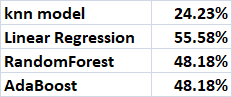

Conclusion : We used different methods for predicting how good the model could be to attain the best numbers we used linear Regression,KNN,ADA Boost,RandomForestRegressor,Pyspark to find which model will be the best to squeeze out the best results.
We got numbers pretty much close to each other like K-fold Linear regression 27% Random forst regressor 48.18% Ada boost 48.18% .Ada boost AND rANDOM fOREST was the best Adaboost at 48.18%..The result is not the best i can say therefore further consideration to analyse is not recommended in this dataset.
Thanks 

Arun Kumar